In [88]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
import os

base_dir = r"..\Dataset"
splits = [r'train', 'test', 'validation']

all_image_paths = []
all_labels = []

for split in splits:
    split_path = os.path.join(base_dir, split)
    for class_name in os.listdir(split_path): 
        class_folder = os.path.join(split_path, class_name)
        if not os.path.isdir(class_folder):
            continue
        for img_file in os.listdir(class_folder):
            img_path = os.path.join(class_folder, img_file)
            all_image_paths.append(img_path)
            all_labels.append(class_name)


In [7]:
for i in range(len(all_image_paths)):
    print(all_image_paths[i],'-------',all_labels[i])

..\Dataset\train\paper\389udM70tLrMVL5H.png ------- paper
..\Dataset\train\paper\4484TuJc6AH7pDOG.png ------- paper
..\Dataset\train\paper\460WcktBwCAzsU0A.png ------- paper
..\Dataset\train\paper\74FZPuPPfVCwqHgO.png ------- paper
..\Dataset\train\paper\755DbuyE4rf2oGPA.png ------- paper
..\Dataset\train\paper\77rce5yVvVPIPmp8.png ------- paper
..\Dataset\train\paper\821xYeW8U0Iy6qVX.png ------- paper
..\Dataset\train\paper\84JL84r6Jcpp5Udi.png ------- paper
..\Dataset\train\paper\89dWYgfIZm624Pf6.png ------- paper
..\Dataset\train\paper\90GH8JQWUw9PUnlA.png ------- paper
..\Dataset\train\paper\a0CaFEDoDB7qeyhN.png ------- paper
..\Dataset\train\paper\A0Dgq561RAiluT9p.png ------- paper
..\Dataset\train\paper\a21pgCIQ9pl0Guv5.png ------- paper
..\Dataset\train\paper\a45DJKHJdnCFhX5X.png ------- paper
..\Dataset\train\paper\a9SyLOjQZE4llCvX.png ------- paper
..\Dataset\train\paper\aac4C8FFlVQw6aGM.png ------- paper
..\Dataset\train\paper\ac0j8jCfz8hwpY0o.png ------- paper
..\Dataset\tra

#### Save with complete path

In [10]:
df1=pd.DataFrame({
    'image:path':all_image_paths,
    'label':all_labels
    
})
df1.to_excel("full_image_labels.xlsx", index=False)

#### Save with base path

In [13]:
df2 = pd.DataFrame({
    'image_name': [os.path.basename(p) for p in all_image_paths],
    'label': all_labels
})
df2.to_excel("image_filenames_labels.xlsx", index=False)

### **Feature Extraction**

In [ ]:
import cv2
from skimage.feature import hog
from tqdm import tqdm

df = pd.read_excel("full_image_labels.xlsx")  

features_list = []
labels_list = []

for i, row in tqdm(df.iterrows(), total=len(df)):
    path = row['image:path']
    label = row['label']
    

    img = cv2.imread(path)
    if img is None:
        continue  
    img = cv2.resize(img, (64, 64))
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)


    features = hog(
        gray, 
        orientations=9, 
        pixels_per_cell=(8, 8), 
        cells_per_block=(2, 2), 
        block_norm='L2-Hys',
        visualize=False
    )

    features_list.append(features)
    labels_list.append(label)


features_df = pd.DataFrame(features_list)
features_df['label'] = labels_list


features_df.to_csv("hog_features_with_labels.csv", index=False)



100%|██████████| 5137/5137 [00:52<00:00, 98.68it/s] 


In [33]:
df_fnl=pd.read_csv(r"hog_features_with_labels.csv")

In [37]:
print(df_fnl.max(numeric_only=True))


0       0.707107
1       0.402157
2       0.360400
3       0.298144
4       0.707107
          ...   
1759    0.446566
1760    0.446566
1761    0.425437
1762    0.421609
1763    0.354628
Length: 1764, dtype: float64


### **Label Encoder**

In [62]:
from sklearn.preprocessing import LabelEncoder,StandardScaler
le=LabelEncoder()

In [63]:
df_fnl['label']=le.fit_transform(df_fnl['label'])

In [64]:
x=df_fnl.drop('label',axis=1)
y=df_fnl['label']

### **Train Test Split**

In [65]:
from sklearn.model_selection import train_test_split

In [66]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [67]:
x_train.shape,x_test.shape

((4109, 1764), (1028, 1764))

### **Class Imbalancing**

In [ ]:
y_train_series = pd.Series(y_train)
print(y_train_series.value_counts())

label
2    1379
1    1368
0    1362
Name: count, dtype: int64


### Label Distribution Analysis

As we clearly see, our training data is fairly balanced with only a small difference between class counts.  
Therefore, **we do not need to apply SMOTE**, as the class imbalance is minimal and unlikely to affect model performance.


### **Standard Scalar**

In [68]:
sc=StandardScaler()
x_train_scaled=sc.fit_transform(x_train)
x_test_scaled=sc.transform(x_test)

## **Machine Learning**

### **Model Training**

In [86]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier

from sklearn.metrics import confusion_matrix,classification_report,accuracy_score


🔍 Evaluating: Logistic Regression


d:\Anaconda\envs\dl_py\lib\site-packages\sklearn\linear_model\_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


Training Accuracy: 1.0000
Test Accuracy:     0.9767

Classification Report (Test Data):
              precision    recall  f1-score   support

           0     0.9686    0.9713    0.9700       349
           1     0.9909    0.9790    0.9849       333
           2     0.9713    0.9798    0.9755       346

    accuracy                         0.9767      1028
   macro avg     0.9769    0.9767    0.9768      1028
weighted avg     0.9767    0.9767    0.9767      1028



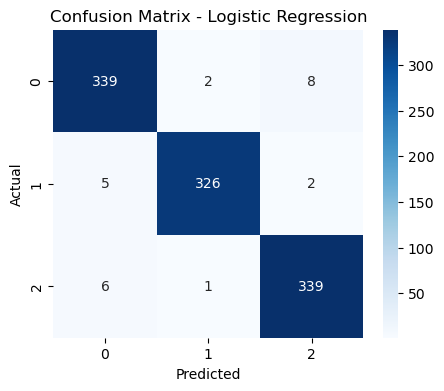


🔍 Evaluating: SVM (RBF Kernel)
Training Accuracy: 0.9995
Test Accuracy:     0.9883

Classification Report (Test Data):
              precision    recall  f1-score   support

           0     0.9802    0.9914    0.9858       349
           1     0.9970    0.9880    0.9925       333
           2     0.9884    0.9855    0.9870       346

    accuracy                         0.9883      1028
   macro avg     0.9885    0.9883    0.9884      1028
weighted avg     0.9884    0.9883    0.9883      1028



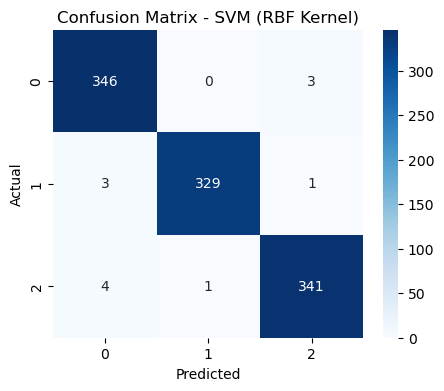


🔍 Evaluating: Random Forest
Training Accuracy: 1.0000
Test Accuracy:     0.9825

Classification Report (Test Data):
              precision    recall  f1-score   support

           0     0.9913    0.9742    0.9827       349
           1     0.9791    0.9850    0.9820       333
           2     0.9771    0.9884    0.9828       346

    accuracy                         0.9825      1028
   macro avg     0.9825    0.9825    0.9825      1028
weighted avg     0.9826    0.9825    0.9825      1028



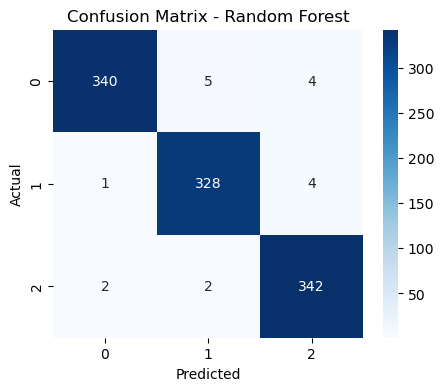


🔍 Evaluating: k-NN
Training Accuracy: 0.9951
Test Accuracy:     0.9961

Classification Report (Test Data):
              precision    recall  f1-score   support

           0     0.9915    1.0000    0.9957       349
           1     0.9970    0.9940    0.9955       333
           2     1.0000    0.9942    0.9971       346

    accuracy                         0.9961      1028
   macro avg     0.9962    0.9961    0.9961      1028
weighted avg     0.9961    0.9961    0.9961      1028



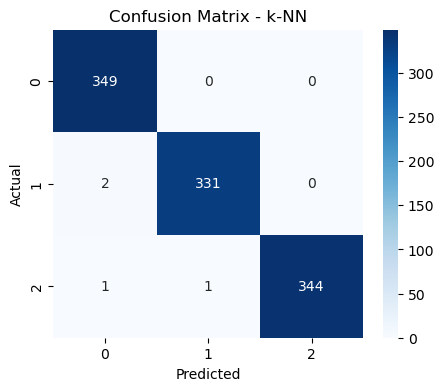


🔍 Evaluating: Decision Tree
Training Accuracy: 1.0000
Test Accuracy:     0.8842

Classification Report (Test Data):
              precision    recall  f1-score   support

           0     0.8462    0.8825    0.8640       349
           1     0.9182    0.9099    0.9140       333
           2     0.8922    0.8613    0.8765       346

    accuracy                         0.8842      1028
   macro avg     0.8855    0.8846    0.8848      1028
weighted avg     0.8850    0.8842    0.8844      1028



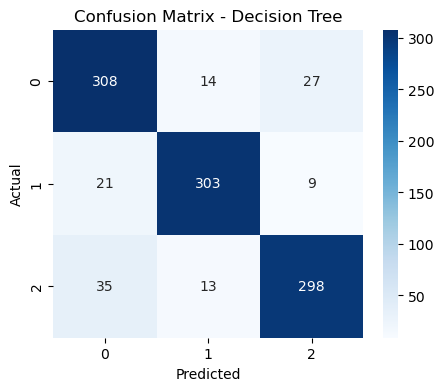

In [ ]:
models = {
    "Logistic Regression": LogisticRegression(multi_class='multinomial', solver='lbfgs', max_iter=1000),
    "SVM (RBF Kernel)": SVC(kernel='rbf'),
    "Random Forest": RandomForestClassifier(),
    "k-NN": KNeighborsClassifier(n_neighbors=5),
    "Decision Tree": DecisionTreeClassifier(),
}

for name, model in models.items():
    print(f"\n🔍 Evaluating: {name}")
    model.fit(x_train_scaled, y_train)

    y_train_pred = model.predict(x_train_scaled)
    y_test_pred = model.predict(x_test_scaled)

    train_acc = accuracy_score(y_train, y_train_pred)
    test_acc = accuracy_score(y_test, y_test_pred)

    print(f"Training Accuracy: {train_acc:.4f}")
    print(f"Test Accuracy:     {test_acc:.4f}")

    print("\nClassification Report (Test Data):")
    print(classification_report(y_test, y_test_pred, digits=4))

    cm = confusion_matrix(y_test, y_test_pred)
    plt.figure(figsize=(5, 4))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.title(f"Confusion Matrix - {name}")
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.show()


## **Artifical Neural Network (ANN)**

In [92]:
import tensorflow
from tensorflow import keras 
from tensorflow.keras import models,layers,callbacks
from tensorflow.keras.layers import Dropout,BatchNormalization

In [252]:
ann=models.Sequential({
    layers.Dense(16,activation='relu',input_shape=(1764,)),
    
    layers.Dense(8,activation='relu'),

    layers.Dense(3,activation='softmax'),
})

In [253]:
ann.compile(optimizer='adamW',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [254]:
early = callbacks.EarlyStopping(
    monitor='val_accuracy',       
    patience=20,               
    restore_best_weights=True 
)

In [255]:
ann.fit(x_train_scaled, y_train, epochs=100, batch_size=32,callbacks=[early], validation_data=(x_test_scaled, y_test))


Epoch 1/100
129/129 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.7329 - loss: 0.6192 - val_accuracy: 0.9572 - val_loss: 0.1686
Epoch 2/100
129/129 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9686 - loss: 0.1211 - val_accuracy: 0.9728 - val_loss: 0.0879
Epoch 3/100
129/129 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9860 - loss: 0.0529 - val_accuracy: 0.9747 - val_loss: 0.0692
Epoch 4/100
129/129 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9945 - loss: 0.0224 - val_accuracy: 0.9796 - val_loss: 0.0548
Epoch 5/100
129/129 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9994 - loss: 0.0084 - val_accuracy: 0.9825 - val_loss: 0.0536
Epoch 6/100
129/129 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9985 - loss: 0.0071 - val_accuracy: 0.9825 - val_loss: 0.0523
Epoch 7/100
129/129 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9996 - loss: 0.0042 - val_accuracy: 0.9844 - val_loss: 0.0560
Epoch 8/100
129/129 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9997 - loss: 0.0021 - val_accu